# Artificial Neural Networks (ANN)

**Objective:**  
Learn the fundamentals of Artificial Neural Networks (ANN), including the architecture, forward pass, backpropagation, activation functions, and training using Python and TensorFlow/PyTorch.


## Introduction

Artificial Neural Networks (ANN) are computing systems inspired by the biological neural networks of the brain.  
They consist of **layers of interconnected nodes (neurons)** that process input data to predict outputs.

### Key Concepts:
- **Neuron:** Basic unit of ANN, applies a weighted sum of inputs followed by an activation function.
- **Layers:** 
  - Input layer
  - Hidden layers
  - Output layer
- **Weights & Biases:** Parameters adjusted during training.
- **Activation Functions:** Non-linear functions such as ReLU, Sigmoid, Tanh.
- **Loss Function:** Measures how far predictions are from actual labels.
- **Optimization:** Gradient Descent is used to minimize the loss.


## Forward Pass

- The **forward pass** computes the output of the network given input data.
- Formula for a single neuron: 

\[
$ y = f(\sum_{i} (w_i \cdot x_i) + b) $
\]

Where:  
- \(x_i\) = input features  
- \(w_i\) = weights  
- \(b\) = bias  
- \(f\) = activation function


In [1]:
import numpy as np

# Input features
X = np.array([0.5, 0.3, 0.2])

# Weights and bias
weights = np.array([0.4, 0.7, 0.2])
bias = 0.1

# Activation function: Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Forward pass calculation
output = sigmoid(np.dot(X, weights) + bias)
print("Output of the neuron:", output)


Output of the neuron: 0.6341355910108007


## Activation Functions

Activation functions introduce non-linearity to the network.

| Function | Formula | Range | Use Case |
|----------|---------|-------|----------|
| Sigmoid  | 1 / (1 + e^-x) | (0,1) | Binary classification |
| Tanh     | (e^x - e^-x) / (e^x + e^-x) | (-1,1) | Hidden layers |
| ReLU     | max(0,x) | [0,∞) | Hidden layers, faster convergence |
| Softmax  | e^x_i / Σe^x_j | (0,1) | Multi-class classification output |


## Loss Function

- Measures the difference between predicted output and actual output.  
- Common loss functions:
  - **Mean Squared Error (MSE)** → Regression
  - **Cross-Entropy Loss** → Classification


## Backpropagation

- The process of updating weights and biases to minimize the loss function.
- Steps:
  1. Compute loss
  2. Calculate gradient of loss w.r.t each weight
  3. Update weights: 

\[
$ w = w - \eta \cdot \frac{\partial L}{\partial w} $
\]

Where:
- \($ \eta\ $) = learning rate
- \($ L\ $) = loss function


## ANN Implementation in TensorFlow

We will implement a simple ANN to classify the **MNIST handwritten digits**.


In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build ANN model
model = Sequential([
    Flatten(input_shape=(28,28)),       # Flatten 28x28 images
    Dense(128, activation='relu'),      # Hidden layer
    Dense(64, activation='relu'),       # Hidden layer
    Dense(10, activation='softmax')     # Output layer for 10 classes
])

# Compile model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


C:\Users\ksiri\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 26ms/step - accuracy: 0.9223 - loss: 0.2661 - val_accuracy: 0.9603 - val_loss: 0.1401
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9652 - loss: 0.1140 - val_accuracy: 0.9599 - val_loss: 0.1283
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9765 - loss: 0.0786 - val_accuracy: 0.9697 - val_loss: 0.1011
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.9811 - loss: 0.0595 - val_accuracy: 0.9745 - val_loss: 0.0863
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9856 - loss: 0.0444 - val_accuracy: 0.9722 - val_loss: 0.1011
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9753 - loss: 0.0833
Test Accuracy: 97.53%


## Loss and Accuracy Curves

Plotting training & validation loss/accuracy helps understand overfitting/underfitting.


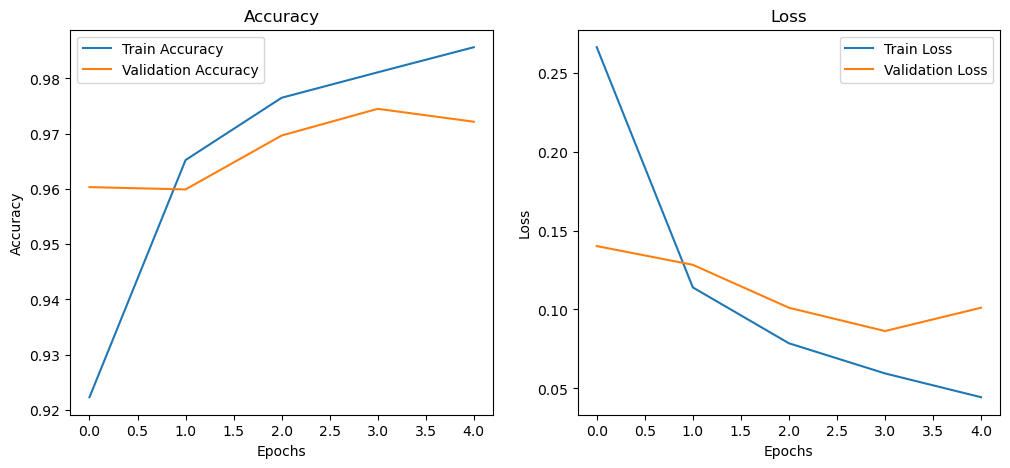

In [5]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Summary

- Built a simple ANN from scratch and using TensorFlow.  
- Learned forward pass, backpropagation, and weight updates.  
- Implemented classification of MNIST dataset.  
- Visualized accuracy and loss to monitor model training.  

**Next Steps:**  
- Implement deeper networks  
- Explore dropout, batch normalization  
- Try PyTorch implementation  
- Work on real-world datasets (tabular, text, image)
